In [1]:
from netCDF4 import Dataset

dataset= Dataset('/home/jovyan/trim-test_1.nc', 'r', format='NETCDF4_CLASSIC')

In [2]:
%matplotlib notebook

In [3]:
import ipywidgets as widgets
from IPython.display import display,clear_output
import matplotlib.pyplot as plt
from ipywidgets import Layout, VBox, HBox
import numpy as np 
import datetime

In [4]:
lista=[[],[],[]]
for n in dataset.variables.keys():
    dimensiones=''
    for i in dataset.variables[n].dimensions:
        dimensiones= dimensiones+" "+i
    lista[0]= np.append(lista[0],n)
    lista[1]= np.append(lista[1],len(dataset.variables[n].dimensions))
    lista[2]= np.append(lista[2],dimensiones)
    

In [5]:
for i in range(len(lista[0])):
    print(lista[0][i], lista[1][i], lista[2][i])

XCOR 2.0  MC NC
YCOR 2.0  MC NC
XZ 2.0  M N
YZ 2.0  M N
ALFAS 2.0  M N
KCU 2.0  MC N
KCV 2.0  M NC
KCS 2.0  M N
DP0 2.0  M N
DPS0 2.0  M N
DPU0 2.0  MC N
DPV0 2.0  M NC
NAMCON 2.0  LSTSCI strlen20
NAMTUR 2.0  LTUR strlen20
ZK_LYR 1.0  K_LYR
ZK 1.0  K_INTF
GSQS 2.0  M N
PPARTITION 2.0  M N
KMAXOUT 1.0  KMAXOUT
KMAXOUT_RESTR 1.0  KMAXOUT_RESTR
RHOCONST 0.0 
GRAVITY 0.0 
grid 0.0 
time 1.0  time
S1 3.0  time M N
KFU 3.0  time MC N
KFV 3.0  time M NC
U1 4.0  time KMAXOUT_RESTR MC N
V1 4.0  time KMAXOUT_RESTR M NC
W 4.0  time KMAXOUT M N
WPHY 4.0  time KMAXOUT_RESTR M N
R1 5.0  time LSTSCI KMAXOUT_RESTR M N
RTUR1 5.0  time LTUR KMAXOUT M N
TAUKSI 3.0  time MC N
TAUETA 3.0  time M NC
TAUMAX 3.0  time M N
VICWW 4.0  time KMAXOUT M N
DICWW 4.0  time KMAXOUT M N
RICH 4.0  time KMAXOUT M N
RHO 4.0  time KMAXOUT_RESTR M N
UMNLDF 3.0  time MC N
VMNLDF 3.0  time M NC
VICUV 4.0  time KMAXOUT_RESTR M N
MNKSRC 3.0  time NSRC length_7
HYDPRES 4.0  time KMAXOUT_RESTR M N


In [6]:
dependencias=[]
for n in lista[2]:
    if n not in dependencias:
        dependencias= np.append(dependencias,n)
    

In [7]:
variables_representadas=[]

In [8]:
variables_3d_coor=[]
for i in range(len(lista[0])):
    if lista[1][i]==3 and lista[0][i] not in 'MNKSRC':
        print(lista[0][i], lista[1][i], lista[2][i])
        variables_3d_coor= np.append(variables_3d_coor, lista[0][i])
        variables_representadas= np.append(variables_representadas, lista[0][i])

S1 3.0  time M N
KFU 3.0  time MC N
KFV 3.0  time M NC
TAUKSI 3.0  time MC N
TAUETA 3.0  time M NC
TAUMAX 3.0  time M N
UMNLDF 3.0  time MC N
VMNLDF 3.0  time M NC


In [9]:
variables_4d=[]
for i in range(len(lista[0])):
    if lista[1][i]==4:
        variables_4d= np.append(variables_4d, lista[0][i])
        variables_representadas= np.append(variables_representadas, lista[0][i])

In [10]:
variables_representadas= np.append(variables_representadas, "Temperature")

In [11]:
print(variables_4d)

['U1' 'V1' 'W' 'WPHY' 'VICWW' 'DICWW' 'RICH' 'RHO' 'VICUV' 'HYDPRES']


In [12]:
for i in range(len(lista[0])):
    if lista[1][i]==5:
        print(lista[0][i], lista[1][i], lista[2][i])

R1 5.0  time LSTSCI KMAXOUT_RESTR M N
RTUR1 5.0  time LTUR KMAXOUT M N


In [13]:
dataset.variables['U1'][0,0,0,0]

masked_array(data=-999.,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [14]:
def humanize_time(secs):
    mins, secs = divmod(secs, 60)
    hours, mins = divmod(mins, 60)
    return '%02d:%02d:%02d' % (hours, mins, secs)

In [15]:
date=[]
for i in range(len(dataset.variables['time'])-1):
    date=np.append(date, humanize_time(dataset.variables['time'][i]))
    print(date[i])

00:00:00
06:00:00
12:00:00
18:00:00


In [16]:
valor_x= widgets.BoundedFloatText(
    value=0,
    min=0,
    max=dataset.variables['XCOR'].shape[0]-1,
    step=1,
    description='x:'
)
valor_y= widgets.BoundedFloatText(
    value=0,
    min=0,
    max=dataset.variables['XCOR'].shape[1]-1,
    step=1,
    description='y:'
)

boton_OK= widgets.Button(
    description='OK'
)



In [17]:
drop_var=widgets.Dropdown(
    options=[(variables_representadas[n], n) for n in range(len(variables_representadas))],
    value=0,
    description='Variables:',
)

In [18]:
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='center',
                    width='100%')


vb_3d= VBox([valor_x, valor_y])
hb_3d=HBox([drop_var,vb_3d, boton_OK], layout=box_layout)

In [19]:
valor_x_ev= widgets.BoundedFloatText(
    value=0,
    min=0,
    max=dataset.variables['XCOR'].shape[0]-1,
    step=1,
    description='x:'
)
valor_y_ev= widgets.BoundedFloatText(
    value=0,
    min=0,
    max=dataset.variables['XCOR'].shape[1]-1,
    step=1,
    description='y:'
)

boton_ev_tiempo= widgets.Button(
    description='Función tiempo'
)

boton_ev_prof= widgets.Button(
    description='Función profundidad'
)
label_ev= widgets.Label("Ver evolución en las coordenadas:")
vb_ev_1= VBox([valor_x_ev, valor_y_ev])
vb_ev_2= VBox([label_ev, vb_ev_1])
hb_ev=HBox([vb_ev_2,boton_ev_tiempo, boton_ev_prof], layout=box_layout)

In [20]:
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(dataset.variables['KMAXOUT'])-1,
    readout=True,
    description='Z',
    continuous_update=False

)

drop_date=widgets.Dropdown(
    options=[(str(date[i]), i) for i in range(len(date))],
    value=0,
    description='Fecha:',
)


hb_4d=HBox([drop_var, drop_date, slider], layout=box_layout)

In [21]:
propiedades=[[],[],[],[],[]]
#propiedades[var,x,y,time,z]

In [22]:
def on_button_clicked_ev_tiempo(b):
    actualiza_display_4d()
    muestra_ev_tiempo()


boton_ev_tiempo.on_click(on_button_clicked_ev_tiempo)

In [23]:
def on_button_clicked_ev_prof(b):
    actualiza_display_4d()
    muestra_ev_prof()


boton_ev_prof.on_click(on_button_clicked_ev_prof)

In [24]:
def muestra_ev_prof():
    fig3= plt.figure()
    fig3.add_subplot()
    eje_x=[i for i in range(len(dataset.variables["KMAXOUT"])-1)]
    if propiedades[0] in "Temperature":
        eje_y=[dataset.variables["R1"][propiedades[3],1,i,valor_x_ev.value,valor_y_ev.value] for i in range(len(dataset.variables["KMAXOUT"])-1)]
    else:
        eje_y=[dataset.variables[propiedades[0]][propiedades[3],i,valor_x_ev.value,valor_y_ev.value] for i in range(len(dataset.variables["KMAXOUT"])-1)]
    
    plt.plot(eje_x,eje_y)
    plt.title(propiedades[0])
    plt.xlabel("profundidad")
    

In [25]:
def muestra_ev_tiempo():
    fig3= plt.figure()
    fig3.add_subplot()
    eje_x=[date[i] for i in range(len(dataset.variables['time'])-1)]
    if propiedades[0] in "Temperature":
        eje_y=[dataset.variables["R1"][i,1,propiedades[4],valor_x_ev.value,valor_y_ev.value] for i in range(len(dataset.variables["R1"])-1)]
    else:
        eje_y=[dataset.variables[propiedades[0]][i,propiedades[4],valor_x_ev.value,valor_y_ev.value] for i in range(len(dataset.variables[propiedades[0]])-1)]
    
    plt.plot(eje_x,eje_y)
    plt.title(propiedades[0])
    plt.xlabel("time")
    

In [26]:
def variable_on_change(v):
    propiedades[0]=variables_representadas[v['new']]
    if(propiedades[0] in variables_3d_coor):
        actualiza_display_3d()
        
    else:
        actualiza_display_4d()
        
    
drop_var.observe(variable_on_change, names='value')

In [27]:
def actualiza_display_3d():
    clear_output(wait=False)
    plt.close()
    display(hb_3d) 
     
    mapa_coordenadas()
    pinta_plot()
    
    
    
    plt.show()

In [28]:
def actualiza_display_4d():
    clear_output(wait=False)
    plt.close()
    
    display(hb_4d)
    if propiedades[0] in "Temperature":
        pinta_mapa_temp()
    else:
        pinta_mapa()
    plt.tight_layout()
    plt.show()
    display(hb_ev)

In [29]:
def mapa_coordenadas():
    fig1= plt.figure()
    fig1.add_subplot()
    plt.imshow(np.transpose(dataset.variables["XCOR"][:,:]))
    plt.title("Escoge coordenadas")
    plt.axis('off')
    cid = fig1.canvas.mpl_connect('button_press_event', onclick)

In [30]:

def pinta_plot():

    fig2= plt.figure()
    fig2.add_subplot()
    eje_x=[date[i] for i in range(len(dataset.variables['time'])-1)]
    eje_y=[dataset.variables[propiedades[0]][i,propiedades[1],propiedades[2]] for i in range(len(dataset.variables[propiedades[0]])-1)]
    
    plt.plot(eje_x,eje_y)
    plt.title(propiedades[0])
    plt.xlabel("time")

In [31]:
def pinta_mapa():
    
    fig= plt.figure()
    fig.add_subplot()
    aux=dataset.variables[propiedades[0]][propiedades[3],propiedades[4],:,:]
    aux[ aux==-999 ] = np.nan
    plt.imshow(np.transpose(aux),\
        cmap= plt.get_cmap('jet'), aspect='equal', origin='lower')
    plt.colorbar()
    plt.title(propiedades[0])
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")
    
    cid = fig.canvas.mpl_connect('button_press_event', onclick2)
    
    

In [32]:
def pinta_mapa_temp():
    
    fig= plt.figure()
    fig.add_subplot()
    aux=dataset.variables["R1"][propiedades[3],1,propiedades[4],:,:]
    aux[ aux==-999 ] = np.nan
    plt.imshow(np.transpose(aux),\
        cmap= plt.get_cmap('jet'), aspect='equal', origin='lower')
    plt.colorbar()
    plt.title(propiedades[0])
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")
    
    cid = fig.canvas.mpl_connect('button_press_event', onclick2)

In [33]:
def onclick2(event):
    global valor_x_ev, valor_y_ev
    valor_x_ev.value=int(event.xdata)
    valor_y_ev.value=int(event.ydata)
        
    
    
    

In [34]:
def onclick(event):
    global propiedades, variables_3d_coor, valor_x, valor_y
    if(propiedades[0] in variables_3d_coor):
        propiedades[1]=int(event.xdata)
        propiedades[2]=int(event.ydata)
        valor_x.value= propiedades[1]
        valor_y.value= propiedades[2]

In [35]:
def on_button_clicked(b):
    actualiza_display_3d()


boton_OK.on_click(on_button_clicked)

In [36]:
def slider_on_change(v):
    
    propiedades[4]=v['new']
    actualiza_display_4d()
    
slider.observe(slider_on_change, names='value')

In [37]:
def date_on_change(v):
    propiedades[3]=v['new']
    actualiza_display_4d()
    
drop_date.observe(date_on_change, names='value')

<IPython.core.display.Javascript object>


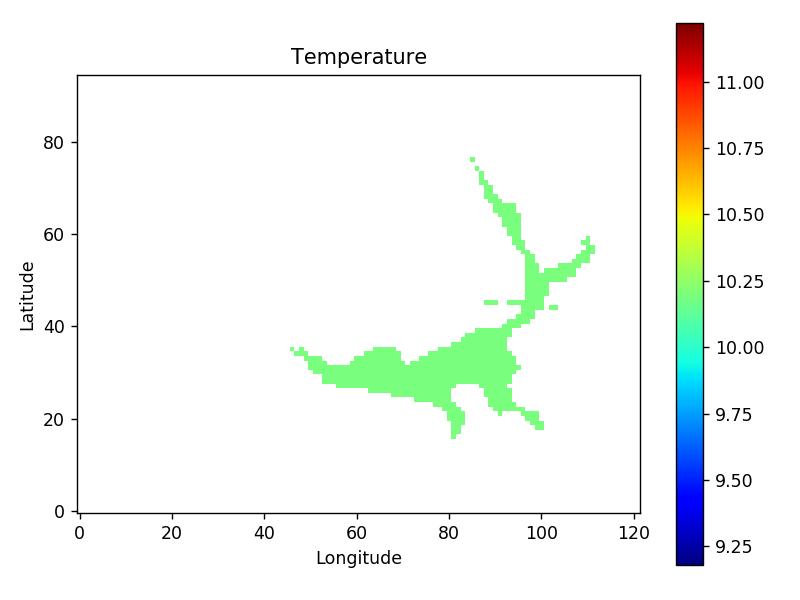

<IPython.core.display.Javascript object>


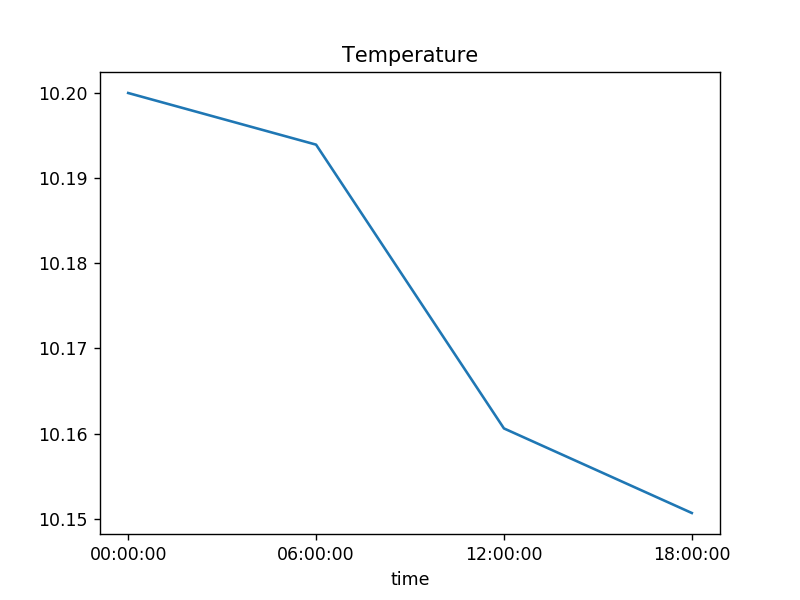

In [38]:
propiedades[0]=variables_3d_coor[0]
propiedades[1]=0
propiedades[2]=0
propiedades[3]=dataset.variables['time'][0]
propiedades[4]=slider.value
actualiza_display_3d()
plt.show()
